Reloading Tuner from hyperparameter_tuning\sentiment_analysis\tuner0.json
Epoch 1/10


C:\Users\26083\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1751/1751 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.7972 - loss: 0.4154 - val_accuracy: 0.9069 - val_loss: 0.2435
Epoch 2/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.9275 - loss: 0.1963 - val_accuracy: 0.9162 - val_loss: 0.2237
Epoch 3/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 76s 43ms/step - accuracy: 0.9426 - loss: 0.1590 - val_accuracy: 0.9157 - val_loss: 0.2361
Epoch 4/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 76s 43ms/step - accuracy: 0.9616 - loss: 0.1100 - val_accuracy: 0.9010 - val_loss: 0.2942
Epoch 5/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.9723 - loss: 0.0846 - val_accuracy: 0.9214 - val_loss: 0.2677
Epoch 6/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 76s 43ms/step - accuracy: 0.9800 - loss: 0.0633 - val_accuracy: 0.9217 - val_loss: 0.2922
Epoch 7/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9858 - loss: 0.0447 - val_accuracy: 0.9141 - val_loss: 0.3164
Epoch 8/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9874 - loss: 0.04

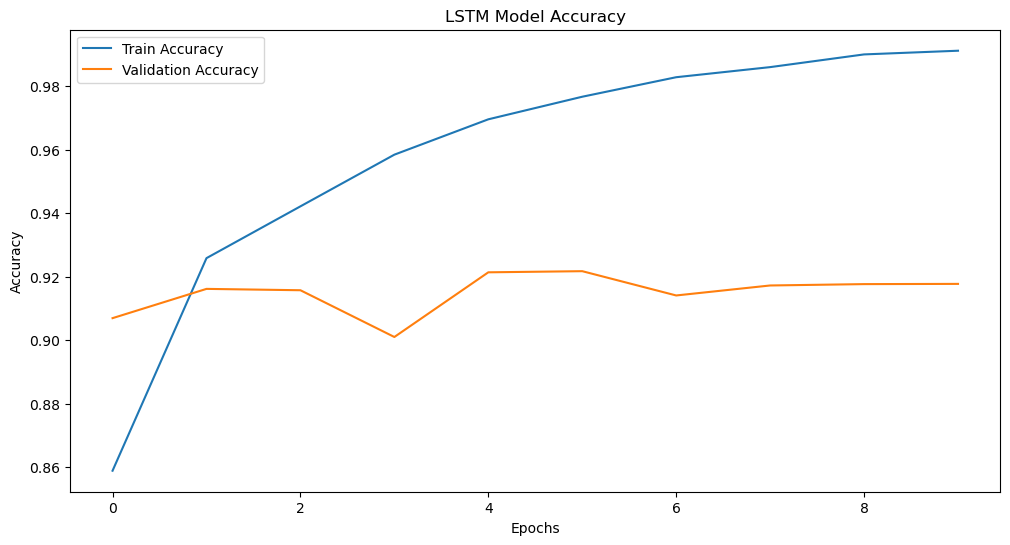

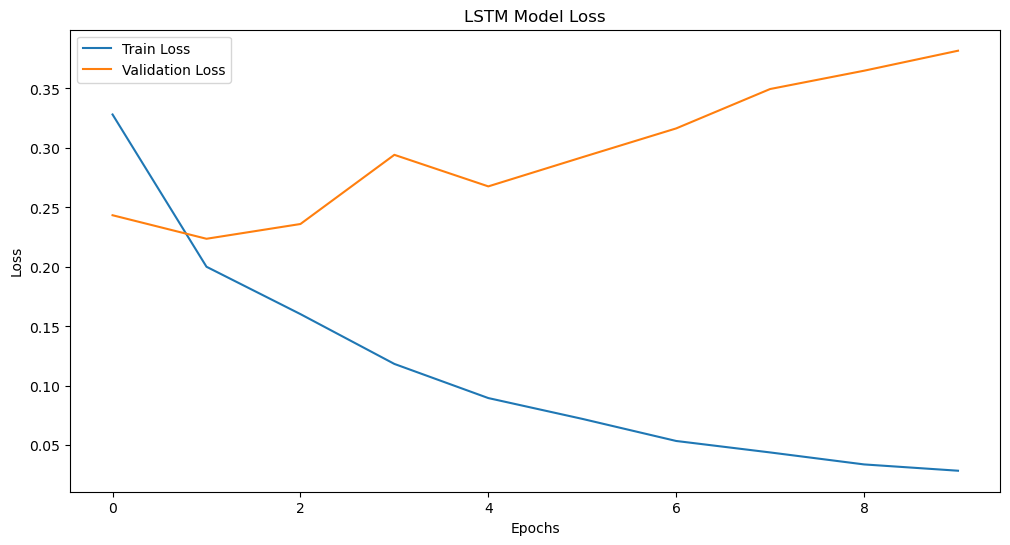

438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step


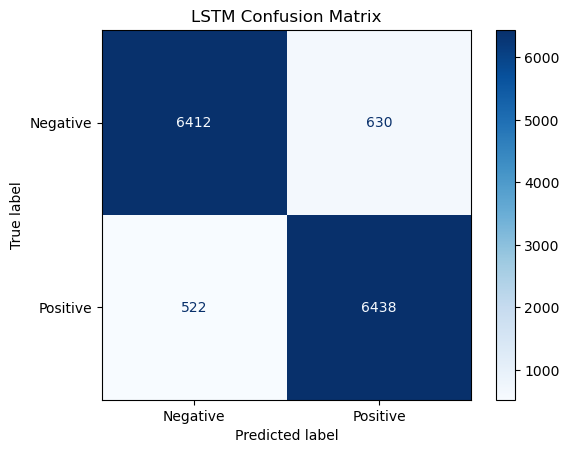

Reloading Tuner from hyperparameter_tuning\sentiment_analysis\tuner0.json
Epoch 1/10


C:\Users\26083\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1751/1751 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8053 - loss: 0.3977 - val_accuracy: 0.9154 - val_loss: 0.2169
Epoch 2/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9531 - loss: 0.1312 - val_accuracy: 0.9217 - val_loss: 0.2075
Epoch 3/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9779 - loss: 0.0676 - val_accuracy: 0.9204 - val_loss: 0.2501
Epoch 4/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9880 - loss: 0.0363 - val_accuracy: 0.9119 - val_loss: 0.3311
Epoch 5/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9907 - loss: 0.0271 - val_accuracy: 0.9178 - val_loss: 0.3415
Epoch 6/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.0199 - val_accuracy: 0.9197 - val_loss: 0.3651
Epoch 7/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9949 - loss: 0.0150 - val_accuracy: 0.9176 - val_loss: 0.4108
Epoch 8/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accurac

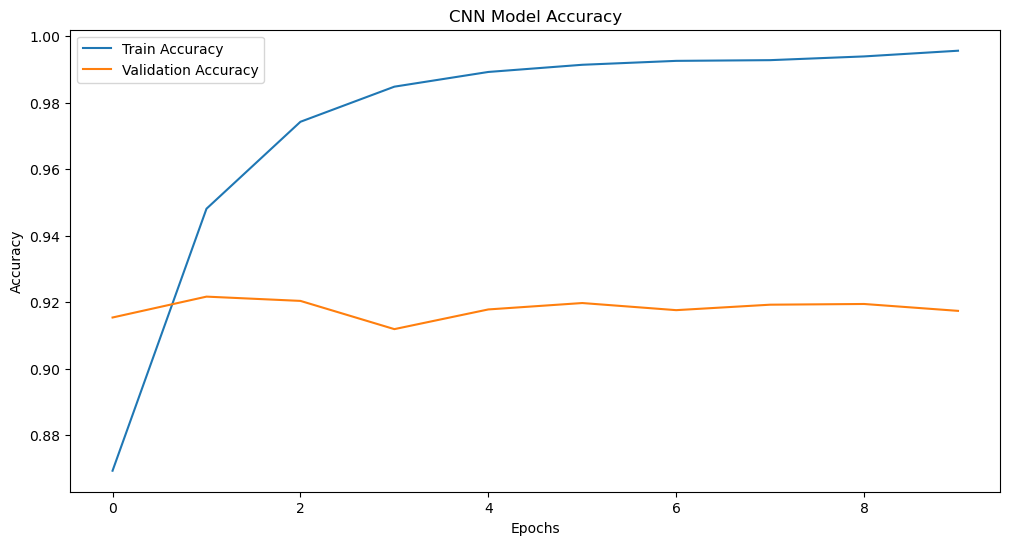

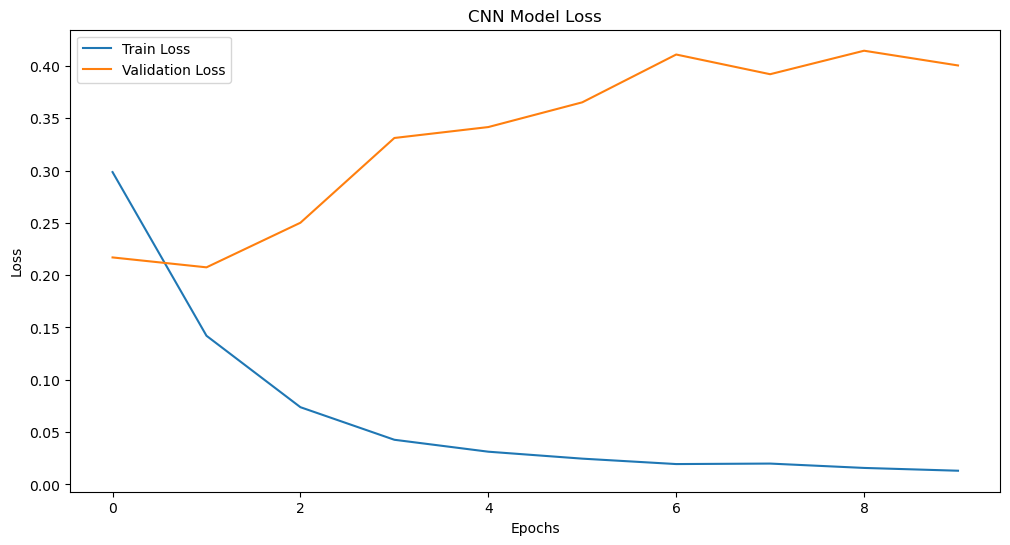

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


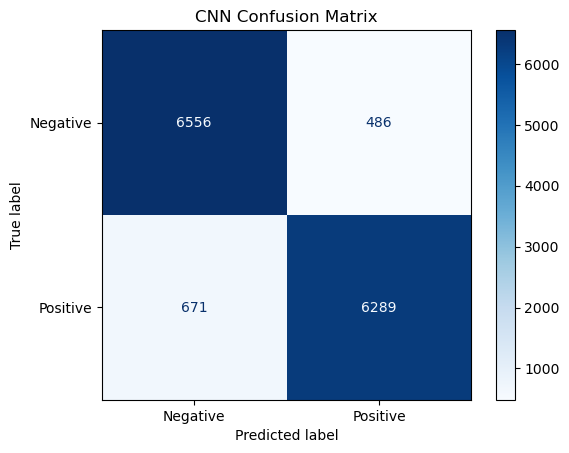

In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import keras_tuner as kt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data Preprocessing Function
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
    texts = df['review'].values
    labels = df['sentiment'].values

    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    data = pad_sequences(sequences, maxlen=200)

    x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
    return x_train, x_val, y_train, y_val, tokenizer

# Hypermodel for LSTM
def build_lstm_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=5000, output_dim=hp.Int('embedding_output_dim', min_value=64, max_value=256, step=32), input_length=200))
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(tf.keras.layers.LSTM(units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32), return_sequences=(i != hp.Int('num_lstm_layers', 1, 3) - 1)))
    model.add(tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hypermodel for CNN
def build_cnn_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=5000, output_dim=hp.Int('embedding_output_dim', min_value=64, max_value=256, step=32), input_length=200))
    model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=32), kernel_size=hp.Choice('kernel_size', [3, 5, 7]), activation='relu'))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter Tuning
def tune_model(build_model, x_train, y_train):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=3,
        directory='hyperparameter_tuning',
        project_name='sentiment_analysis'
    )

    tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[tf.keras.callbacks.TensorBoard(log_dir=f'logs/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}_tuning')])
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    return tuner, best_hps

# Model Training Pipeline
def train_and_evaluate_model(build_model, best_hps, x_train, y_train, x_val, y_val):
    model = build_model(best_hps)
    log_dir = f'logs/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}_training'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    
    loss, accuracy = model.evaluate(x_val, y_val)
    print(f'Validation Loss: {loss}')
    print(f'Validation Accuracy: {accuracy}')
    
    y_pred = (model.predict(x_val) > 0.5).astype("int32")
    print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))

    return model, history

# Visualization Function
def plot_model_performance(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_confusion_matrix(y_val, y_pred, model_name):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Main Function
def main():
    # Preprocess the data
    x_train, x_val, y_train, y_val, tokenizer = preprocess_data('cleaned_augmented_IMDB_Dataset.csv')

    # Tune LSTM Model
    lstm_tuner, lstm_best_hps = tune_model(build_lstm_model, x_train, y_train)
    lstm_model, lstm_history = train_and_evaluate_model(build_lstm_model, lstm_best_hps, x_train, y_train, x_val, y_val)
    plot_model_performance(lstm_history, 'LSTM')
    lstm_y_pred = (lstm_model.predict(x_val) > 0.5).astype("int32")
    plot_confusion_matrix(y_val, lstm_y_pred, 'LSTM')

    # Tune CNN Model
    cnn_tuner, cnn_best_hps = tune_model(build_cnn_model, x_train, y_train)
    cnn_model, cnn_history = train_and_evaluate_model(build_cnn_model, cnn_best_hps, x_train, y_train, x_val, y_val)
    plot_model_performance(cnn_history, 'CNN')
    cnn_y_pred = (cnn_model.predict(x_val) > 0.5).astype("int32")
    plot_confusion_matrix(y_val, cnn_y_pred, 'CNN')

if __name__ == "__main__":
    main()


Reloading Tuner from hyperparameter_tuning\sentiment_analysis\tuner0.json


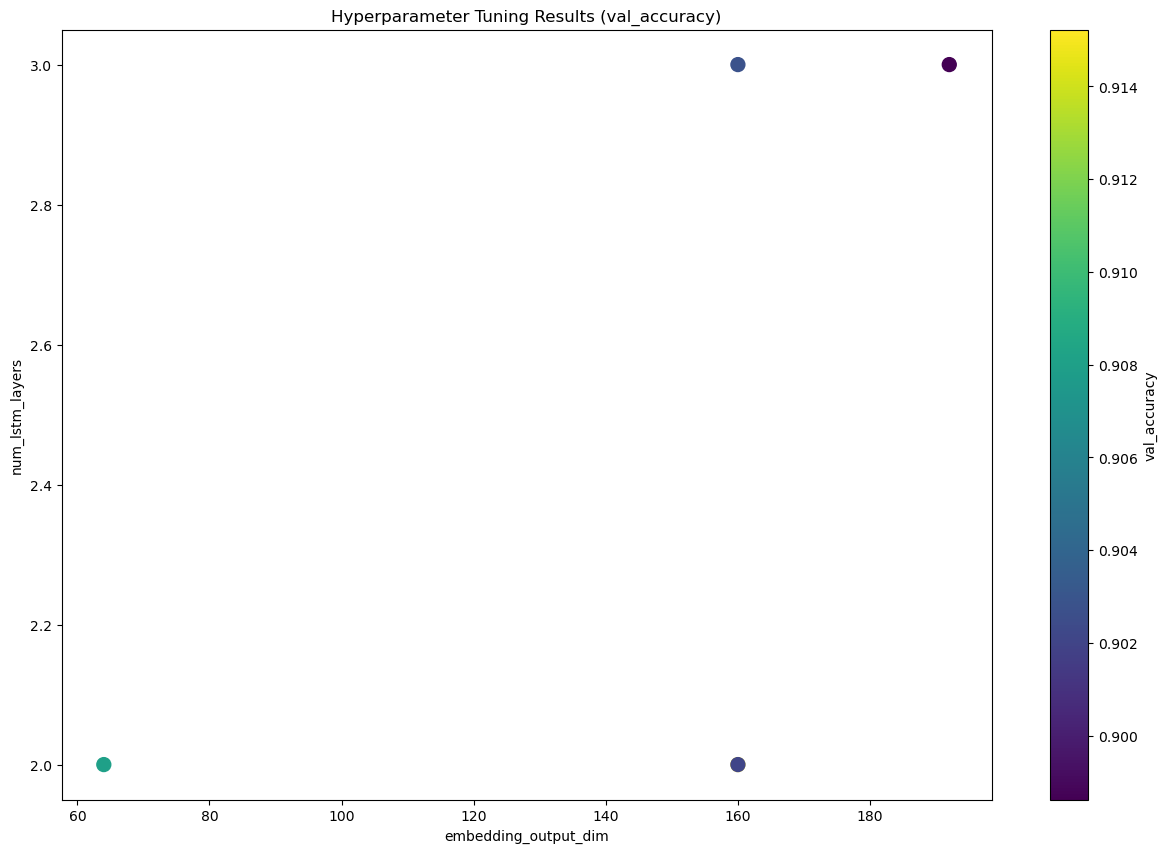

Epoch 1/10


C:\Users\26083\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1751/1751 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.7868 - loss: 0.4370 - val_accuracy: 0.8023 - val_loss: 0.4409
Epoch 2/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9097 - loss: 0.2371 - val_accuracy: 0.9157 - val_loss: 0.2208
Epoch 3/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.9446 - loss: 0.1574 - val_accuracy: 0.9196 - val_loss: 0.2214
Epoch 4/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.9349 - loss: 0.1685 - val_accuracy: 0.9150 - val_loss: 0.2357
Epoch 5/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.9661 - loss: 0.1012 - val_accuracy: 0.9187 - val_loss: 0.2491
Epoch 6/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9752 - loss: 0.0794 - val_accuracy: 0.9197 - val_loss: 0.2690
Epoch 7/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9807 - loss: 0.0627 - val_accuracy: 0.9207 - val_loss: 0.3146
Epoch 8/10
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9840 - loss: 0.05

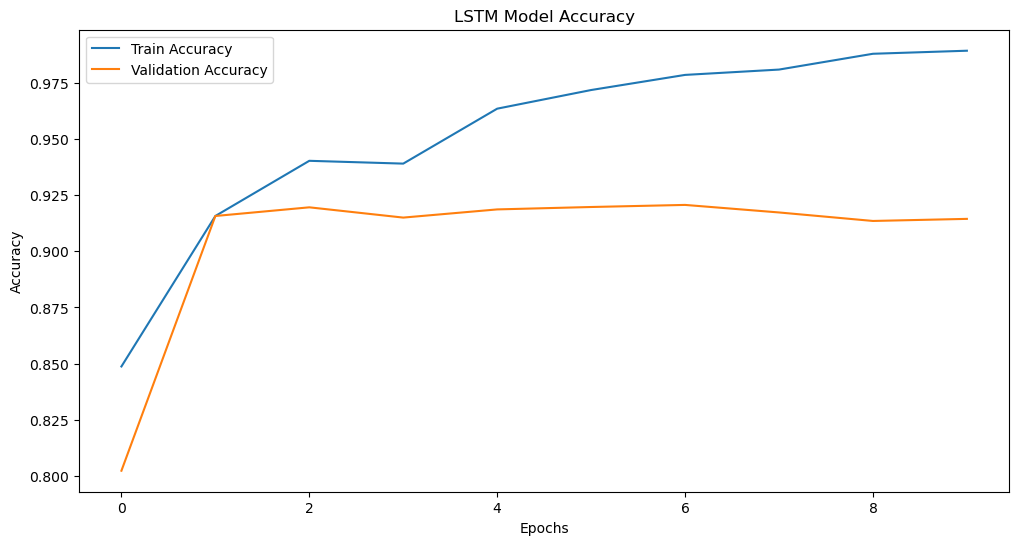

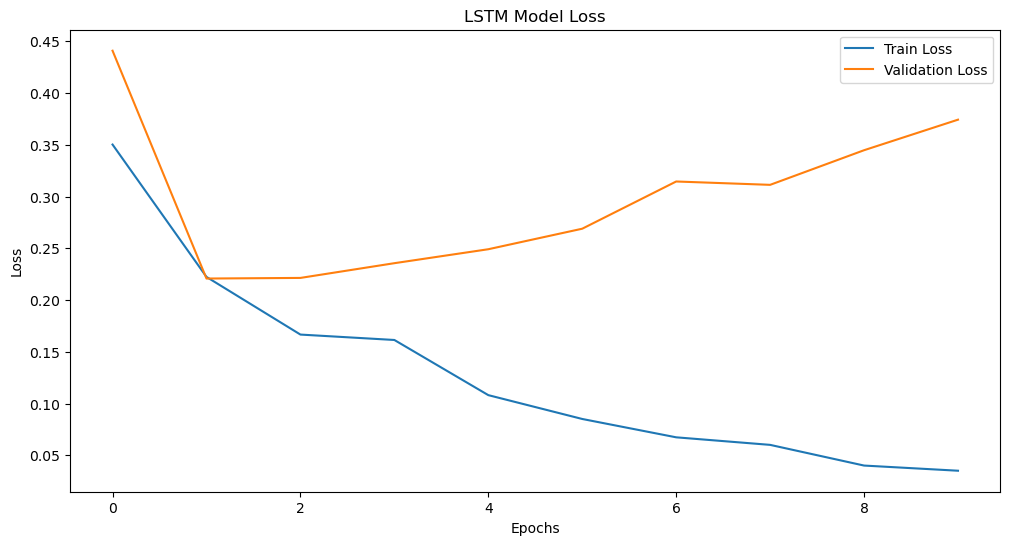

438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


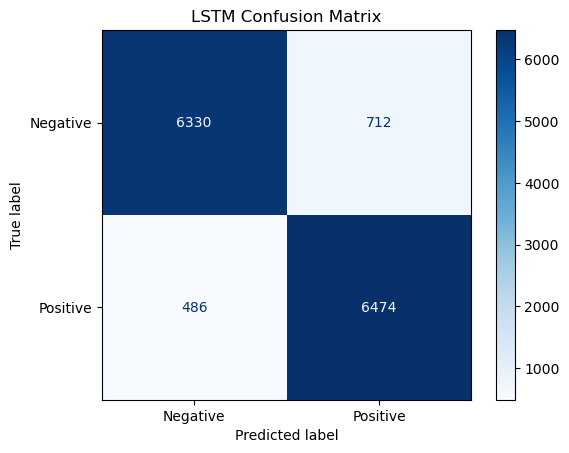

INFO:tensorflow:Assets written to: C:\Users\26083\AppData\Local\Temp\tmpdcrrohe4\assets


INFO:tensorflow:Assets written to: C:\Users\26083\AppData\Local\Temp\tmpdcrrohe4\assets


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import keras_tuner as kt
import matplotlib.pyplot as plt
import datetime

# Data Preprocessing Function
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
    texts = df['review'].values
    labels = df['sentiment'].values

    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    data = pad_sequences(sequences, maxlen=200)

    x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
    return x_train, x_val, y_train, y_val, tokenizer

# Hypermodel for LSTM
def build_lstm_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=5000, output_dim=hp.Int('embedding_output_dim', min_value=64, max_value=256, step=32), input_length=200))
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(tf.keras.layers.LSTM(units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32), return_sequences=(i != hp.Int('num_lstm_layers', 1, 3) - 1)))
    model.add(tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hypermodel for CNN
def build_cnn_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=5000, output_dim=hp.Int('embedding_output_dim', min_value=64, max_value=256, step=32), input_length=200))
    model.add(tf.keras.layers.Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=32), kernel_size=hp.Choice('kernel_size', [3, 5, 7]), activation='relu'))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter Tuning
def tune_model(build_model, x_train, y_train):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=3,
        directory='hyperparameter_tuning',
        project_name='sentiment_analysis'
    )

    tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[tf.keras.callbacks.TensorBoard(log_dir=f'logs/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}_tuning')])
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    return tuner, best_hps

# Model Training Pipeline
def train_and_evaluate_model(build_model, best_hps, x_train, y_train, x_val, y_val, model_name):
    model = build_model(best_hps)
    log_dir = f'logs/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}_training_{model_name}'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    
    loss, accuracy = model.evaluate(x_val, y_val)
    print(f'{model_name} Validation Loss: {loss}')
    print(f'{model_name} Validation Accuracy: {accuracy}')
    
    y_pred = (model.predict(x_val) > 0.5).astype("int32")
    print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))

    return model, history

# Visualization Function
def plot_model_performance(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_confusion_matrix(y_val, y_pred, model_name):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Function to visualize hyperparameter tuning results
def visualize_hyperparameter_tuning(tuner, metric='val_accuracy'):
    # Get all trials
    trials = tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials))
    
    # Extract hyperparameters and corresponding performance metrics
    hp_values = []
    metrics = []
    for trial in trials:
        hp_values.append(trial.hyperparameters.values)
        metrics.append(trial.metrics.get_last_value(metric))
    
    # Plotting
    plt.figure(figsize=(15, 10))
    
    # For simplicity, we'll just plot the first two hyperparameters
    hp_names = list(hp_values[0].keys())[:2]
    x = [hp[hp_names[0]] for hp in hp_values]
    y = [hp[hp_names[1]] for hp in hp_values]
    c = metrics
    
    scatter = plt.scatter(x, y, c=c, cmap='viridis', s=100)
    plt.colorbar(scatter, label=metric)
    plt.xlabel(hp_names[0])
    plt.ylabel(hp_names[1])
    plt.title(f'Hyperparameter Tuning Results ({metric})')
    plt.show()

# Save the model in .h5 and TensorFlow Lite formats
def save_model(model, model_name):
    # Save as .h5
    model.save(f'{model_name}.h5')
    
    # Convert to TensorFlow Lite model
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    
    # Save the TensorFlow Lite model
    with open(f'{model_name}.tflite', 'wb') as f:
        f.write(tflite_model)

# Main Function
def main():
    # Preprocess the data
    x_train, x_val, y_train, y_val, tokenizer = preprocess_data('cleaned_augmented_IMDB_Dataset.csv')

    # Tune LSTM Model
    lstm_tuner, lstm_best_hps = tune_model(build_lstm_model, x_train, y_train)
    visualize_hyperparameter_tuning(lstm_tuner, metric='val_accuracy')
    lstm_model, lstm_history = train_and_evaluate_model(build_lstm_model, lstm_best_hps, x_train, y_train, x_val, y_val, 'LSTM')
    plot_model_performance(lstm_history, 'LSTM')
    lstm_y_pred = (lstm_model.predict(x_val) > 0.5).astype("int32")
    plot_confusion_matrix(y_val, lstm_y_pred, 'LSTM')
    save_model(lstm_model, 'lstm_model')

    # Tune CNN Model
    cnn_tuner, cnn_best_hps = tune_model(build_cnn_model, x_train, y_train)
    visualize_hyperparameter_tuning(cnn_tuner, metric='val_accuracy')
    cnn_model, cnn_history = train_and_evaluate_model(build_cnn_model, cnn_best_hps, x_train, y_train, x_val, y_val, 'CNN')
    plot_model_performance(cnn_history, 'CNN')
    cnn_y_pred = (cnn_model.predict(x_val) > 0.5).astype("int32")
    plot_confusion_matrix(y_val, cnn_y_pred, 'CNN')
    save_model(cnn_model, 'cnn_model')
    # Save the best model
    lstm_model.save('best_sentiment_analysis_model.h5')

if __name__ == "__main__":
    main()


